# Trazado e Hidrología Cuenca Río Negro 

In [2]:
%matplotlib inline
from wmf import wmf 
import numpy as np
import pylab as pl
import datetime as dt
import os

## Trazado Cuenca y Red hídrica 

In [4]:
DEM=wmf.read_map_raster('/media/nicolas/Home/nicolas/09_Cornare/raster/dem.tif',True)
DIR=wmf.read_map_raster('/media/nicolas/Home/nicolas/09_Cornare/raster/dir.tif',True)
wmf.cu.nodata=-9999.0; wmf.cu.dxp=60.0
DIR[DIR<=0]=wmf.cu.nodata.astype(int)
DIR=wmf.cu.dir_reclass(DIR,wmf.cu.ncols,wmf.cu.nrows)

In [5]:
st = wmf.Stream(-75.4624, 6.1058, DEM, DIR, name='rio_negro')

In [8]:
st.Save_Stream2Map('/home/nicolas/Dropbox/Temporal/Corr_RioNegro.shp')

In [17]:
cu = wmf.SimuBasin(-75.3503, 6.1908, DEM, DIR, stream=st, name='Rio_Negro', umbral=100)

In [12]:
cu.Save_Basin2Map('/media/nicolas/Home/nicolas/09_Cornare/vector/CuencaRioNegro.shp', dx=60,GeoParam=True)

In [18]:
cu.Save_Net2Map('/media/nicolas/Home/nicolas/09_Cornare/vector/Red_RioNegro.shp')

In [111]:
cu.Save_SimuBasin('/media/nicolas/Home/nicolas/09_Cornare/nc_cuencas/Cuenca_RioNegro_v1.nc', 
    '/media/nicolas/Home/nicolas/09_Cornare/raster/dem.tif',
    '/media/nicolas/Home/nicolas/09_Cornare/raster/dir.tif')

## Análisis Gemoroflogía 

In [48]:
rutaFig = '/media/nicolas/Home/nicolas/09_Cornare/Figuras/'
shp = ['/media/nicolas/Home/nicolas/09_Cornare/vector/Red_RioNegro']

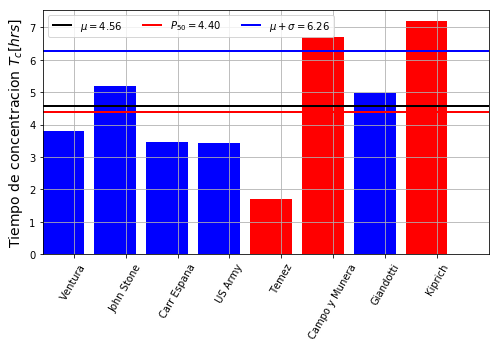

In [25]:
cu.GetGeo_Cell_Basics()
cu.GetGeo_Parameters(rutaFig+'Parametros.txt', plotTc=True, rutaTcPlot=rutaFig+'TiempoConcentracion.png')

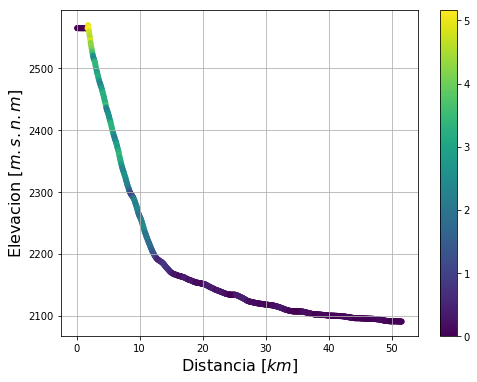

In [36]:
cu.GetGeo_Ppal_Hipsometric(umbral=500,intervals=50)
cu.Plot_Hipsometric(rutaFig+'CurvaHipsiometrica.png')
cu.PlotPpalStream(rutaFig+'CaucePpal.png')

In [37]:
cu.GetGeo_IsoChrones(Tc = 4.4, Niter=5)

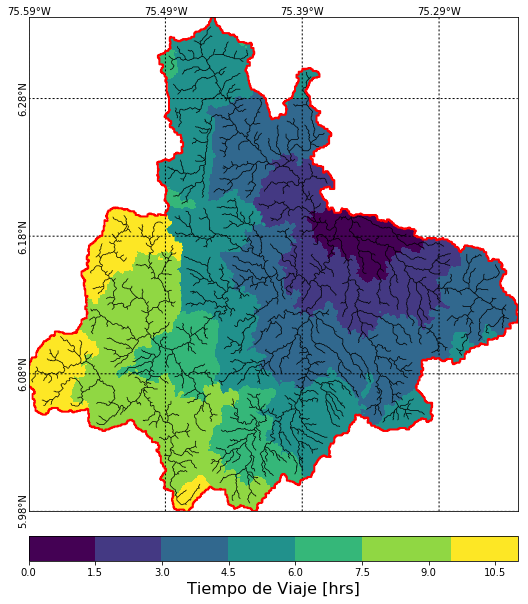

In [53]:
m, ax = cu.Plot_basin(cu.CellTravelTime, figsize=(10,10),
    colorTable=pl.get_cmap('viridis',7),colorbarLabel = 'Tiempo de Viaje [hrs]',
    ruta = rutaFig+'Mapa_TiempoViaje.png',
    lines_spaces=0.1, 
    rutaShp=shp, 
    shpWidth=[0.7], 
    shpColor=['k'],
    ShpIsPolygon = [False])

In [58]:
cu.GetGeo_HAND()
cu.GetGeo_Horton()

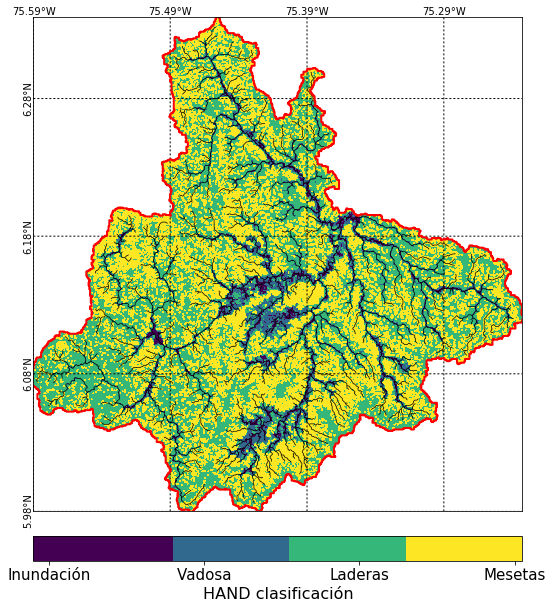

In [61]:
m, ax = cu.Plot_basin(cu.CellHAND_class, figsize=(10,10),
    colorTable=pl.get_cmap('viridis',4),colorbarLabel = u'HAND clasificación',
    ruta = rutaFig+'Mapa_HAND.png',
    lines_spaces=0.1, 
    rutaShp=shp, 
    shpWidth=[0.7], 
    shpColor=['k'],
    ShpIsPolygon = [False],
    cbar_ticks = [1,2,3,4],
    cbar_ticklabels= [u'Inundación','Vadosa','Laderas','Mesetas'],
    cbar_ticksize = 15)

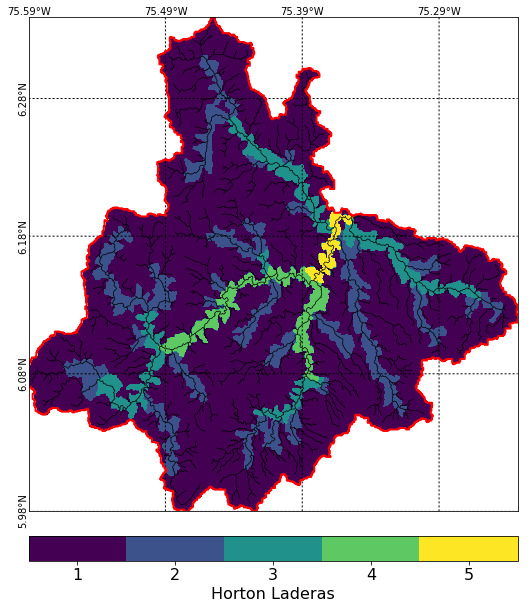

In [65]:
m, ax = cu.Plot_basin(cu.CellHorton_Hill, figsize=(10,10),
    colorTable=pl.get_cmap('viridis',5),colorbarLabel = u'Horton Laderas',
    ruta = rutaFig+'Mapa_HAND.png',
    lines_spaces=0.1, 
    rutaShp=shp, 
    shpWidth=[0.7], 
    shpColor=['k'],
    ShpIsPolygon = [False],
    cbar_ticks = [1.5,2.5,3.5,4.5,5.5],
    cbar_ticklabels= [1,2,3,4,5],
    cbar_ticksize = 16)

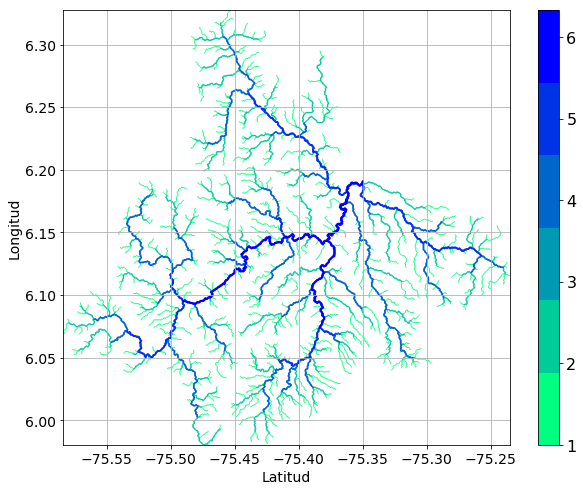

[-75.583916, -75.235069, 5.9804387, 6.3276658]

In [125]:
cu.Plot_Net(cu.CellHorton_Stream, cu.CellHorton_Stream, vmin=1, vmax=5, 
    ruta= rutaFig + 'Mapa_HortonCanales.png',
    cmap = pl.get_cmap('winter_r',6),
    cbar_ticks = np.arange(1,7,0.75),
    cbar_ticklabels= [1,2,3,4,5,6],
    cbar_ticksize = 16)

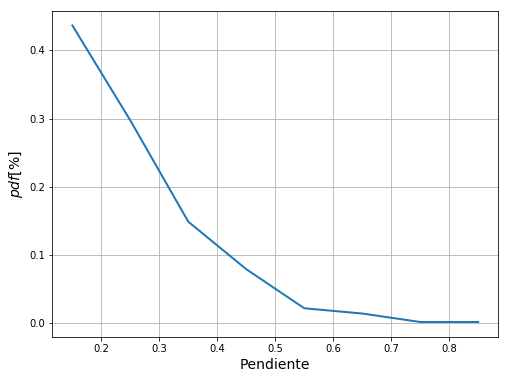

In [94]:
cu.PlotSlopeHist(rutaFig+'Histo_Pendientes.png', bins=[0.1, 1, 0.1])

In [95]:
PendClass = np.zeros(cu.ncells)
PendClass[cu.CellSlope <0.3] = 1
PendClass[(cu.CellSlope>=0.3) & (cu.CellSlope<0.4)] = 2
PendClass[(cu.CellSlope>=0.4) & (cu.CellSlope<0.6)] = 3
PendClass[(cu.CellSlope>0.6)] = 4

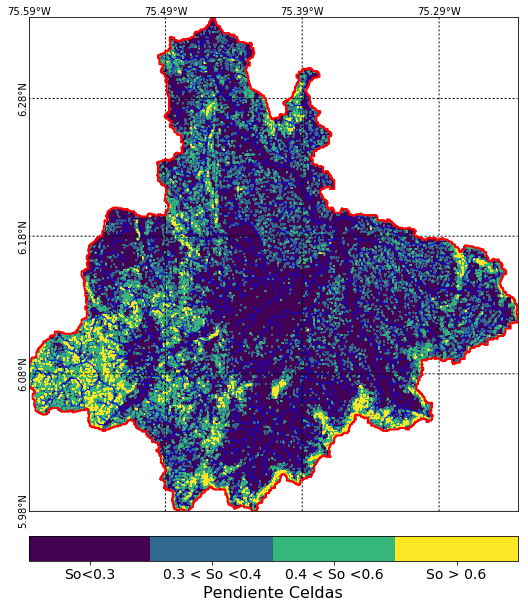

In [103]:
m, ax = cu.Plot_basin(PendClass, figsize=(10,10),
    colorTable=pl.get_cmap('viridis',4),colorbarLabel = u'Pendiente Celdas',
    ruta = rutaFig+'Mapa_Slope.png',
    lines_spaces=0.1, 
    rutaShp=shp, 
    shpWidth=[0.7], 
    shpColor=['b'],
    ShpIsPolygon = [False],
    cbar_ticks = [0.5,1.5,2.5,3.5],
    cbar_ticklabels= ['So<0.3', '0.3 < So <0.4', '0.4 < So <0.6','So > 0.6'],
    cbar_ticksize = 14)

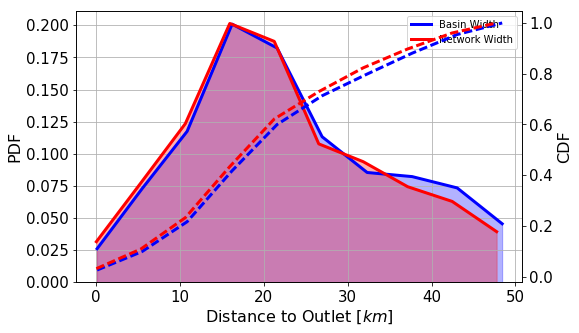

In [108]:
cu.GetGeo_WidthFunction(binsC=10, binsN=10, ruta = rutaFig + 'FuncionAncho.png')

## Hidrologia 

In [112]:
Precip, p = wmf.read_map_raster('/home/nicolas/Dropbox/Trabajos/HZ_Energy_2/raster/PrecipHurtado.tif')
Precip = cu.Transform_Map2Basin(Precip, p)
cu.GetQ_Balance(Precip)

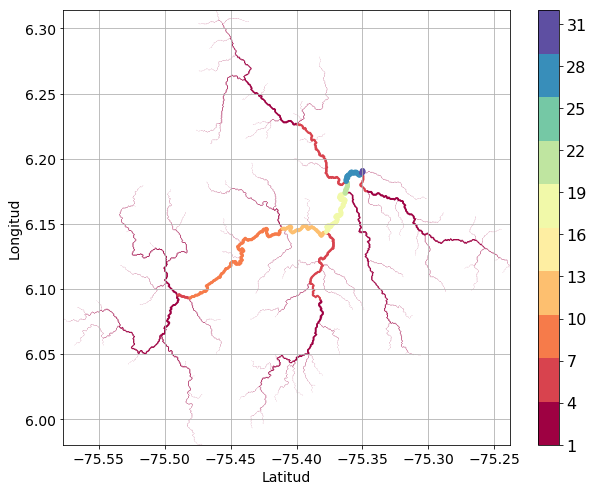

[-75.576904, -75.238304, 5.9804387, 6.3141866]

In [124]:
cu.Plot_Net(cu.CellQmed, cu.CellQmed, vmin=1, vmax=32, 
    ruta= rutaFig + 'Mapa_CaudalesMedios.png',
    cmap = pl.get_cmap('Spectral',10),
    cbar_ticks = np.arange(1,35,3),
    cbar_ticklabels= np.arange(1,35,3),
    cbar_ticksize = 16)